In [21]:
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10000])
    plt.xlabel('Epoch')
    plt.ylabel('Error [AVG]')
    plt.legend()
    plt.grid(True)

In [23]:
raw_dataset = pd.read_csv("data/train/sum_data.csv")
raw_dataset.drop(columns=['lat_y', 'lon_y', 'geo_h3_10', 'lat_x', 'lon_x', 'city'], inplace=True)
dataset = raw_dataset.loc[:, ~raw_dataset.columns.str.contains('^Unnamed')]
dataset = dataset.fillna(0)

In [24]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [25]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('avg')
test_labels = test_features.pop('avg')

In [26]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [27]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

In [28]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [29]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: total: 3.2 s
Wall time: 2.47 s


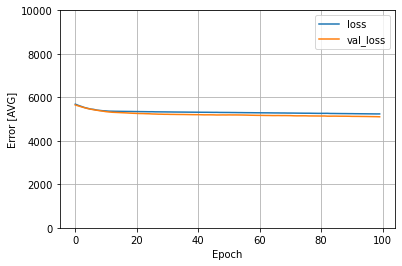

In [30]:
plot_loss(history)

In [31]:
linear_model.evaluate(
    test_features, test_labels, verbose=0)

4049.46240234375